# AI in India (Improving Mental Health)

## 1. Importing Data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [3]:
data = pd.read_csv('survey.csv')

In [4]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
data.shape

(1259, 27)

## Describing features:
This dataset contains the following data:

- Timestamp

- Age

- Gender

- Country

- state: If you live in the United States, which state or territory do you live in?

- self_employed: Are you self-employed?

- family_history: Do you have a family history of mental illness?

- treatment: Have you sought treatment for a mental health condition?

- work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

- no_employees: How many employees does your company or organization have?

- remote_work: Do you work remotely (outside of an office) at least 50% of the time?

- tech_company: Is your employer primarily a tech company/organization?

- benefits: Does your employer provide mental health benefits?

- care_options: Do you know the options for mental health care your employer provides?

- wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

- seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

- anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

- leave: How easy is it for you to take medical leave for a mental health condition?

- mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

- phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

- coworkers: Would you be willing to discuss a mental health issue with your coworkers?

- supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

- mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?

- phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?

- mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health?

- obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

- comments: Any additional notes or comments

## 2. Exploratory Data Analysis

In [6]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


## NOTE: All variables except Age are categorical

## Data types validation
Checking if all features are of correct data type

In [7]:
data.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [8]:
## Processes on Datetime
#data['Timestamp'] = pd.to_datetime(data['Timestamp'])
#data['Time_Year'] = data['Timestamp'].dt.year
#data['Time_Month'] = data['Timestamp'].dt.month
#We require only year and month
#data.drop('Timestamp', axis = 1, inplace=True)

In [9]:
# Removing less important features to match Indian audience
data.drop(['Timestamp', 'state', 'comments'], axis=1, inplace=True)

E:\AnacondaInstaller\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


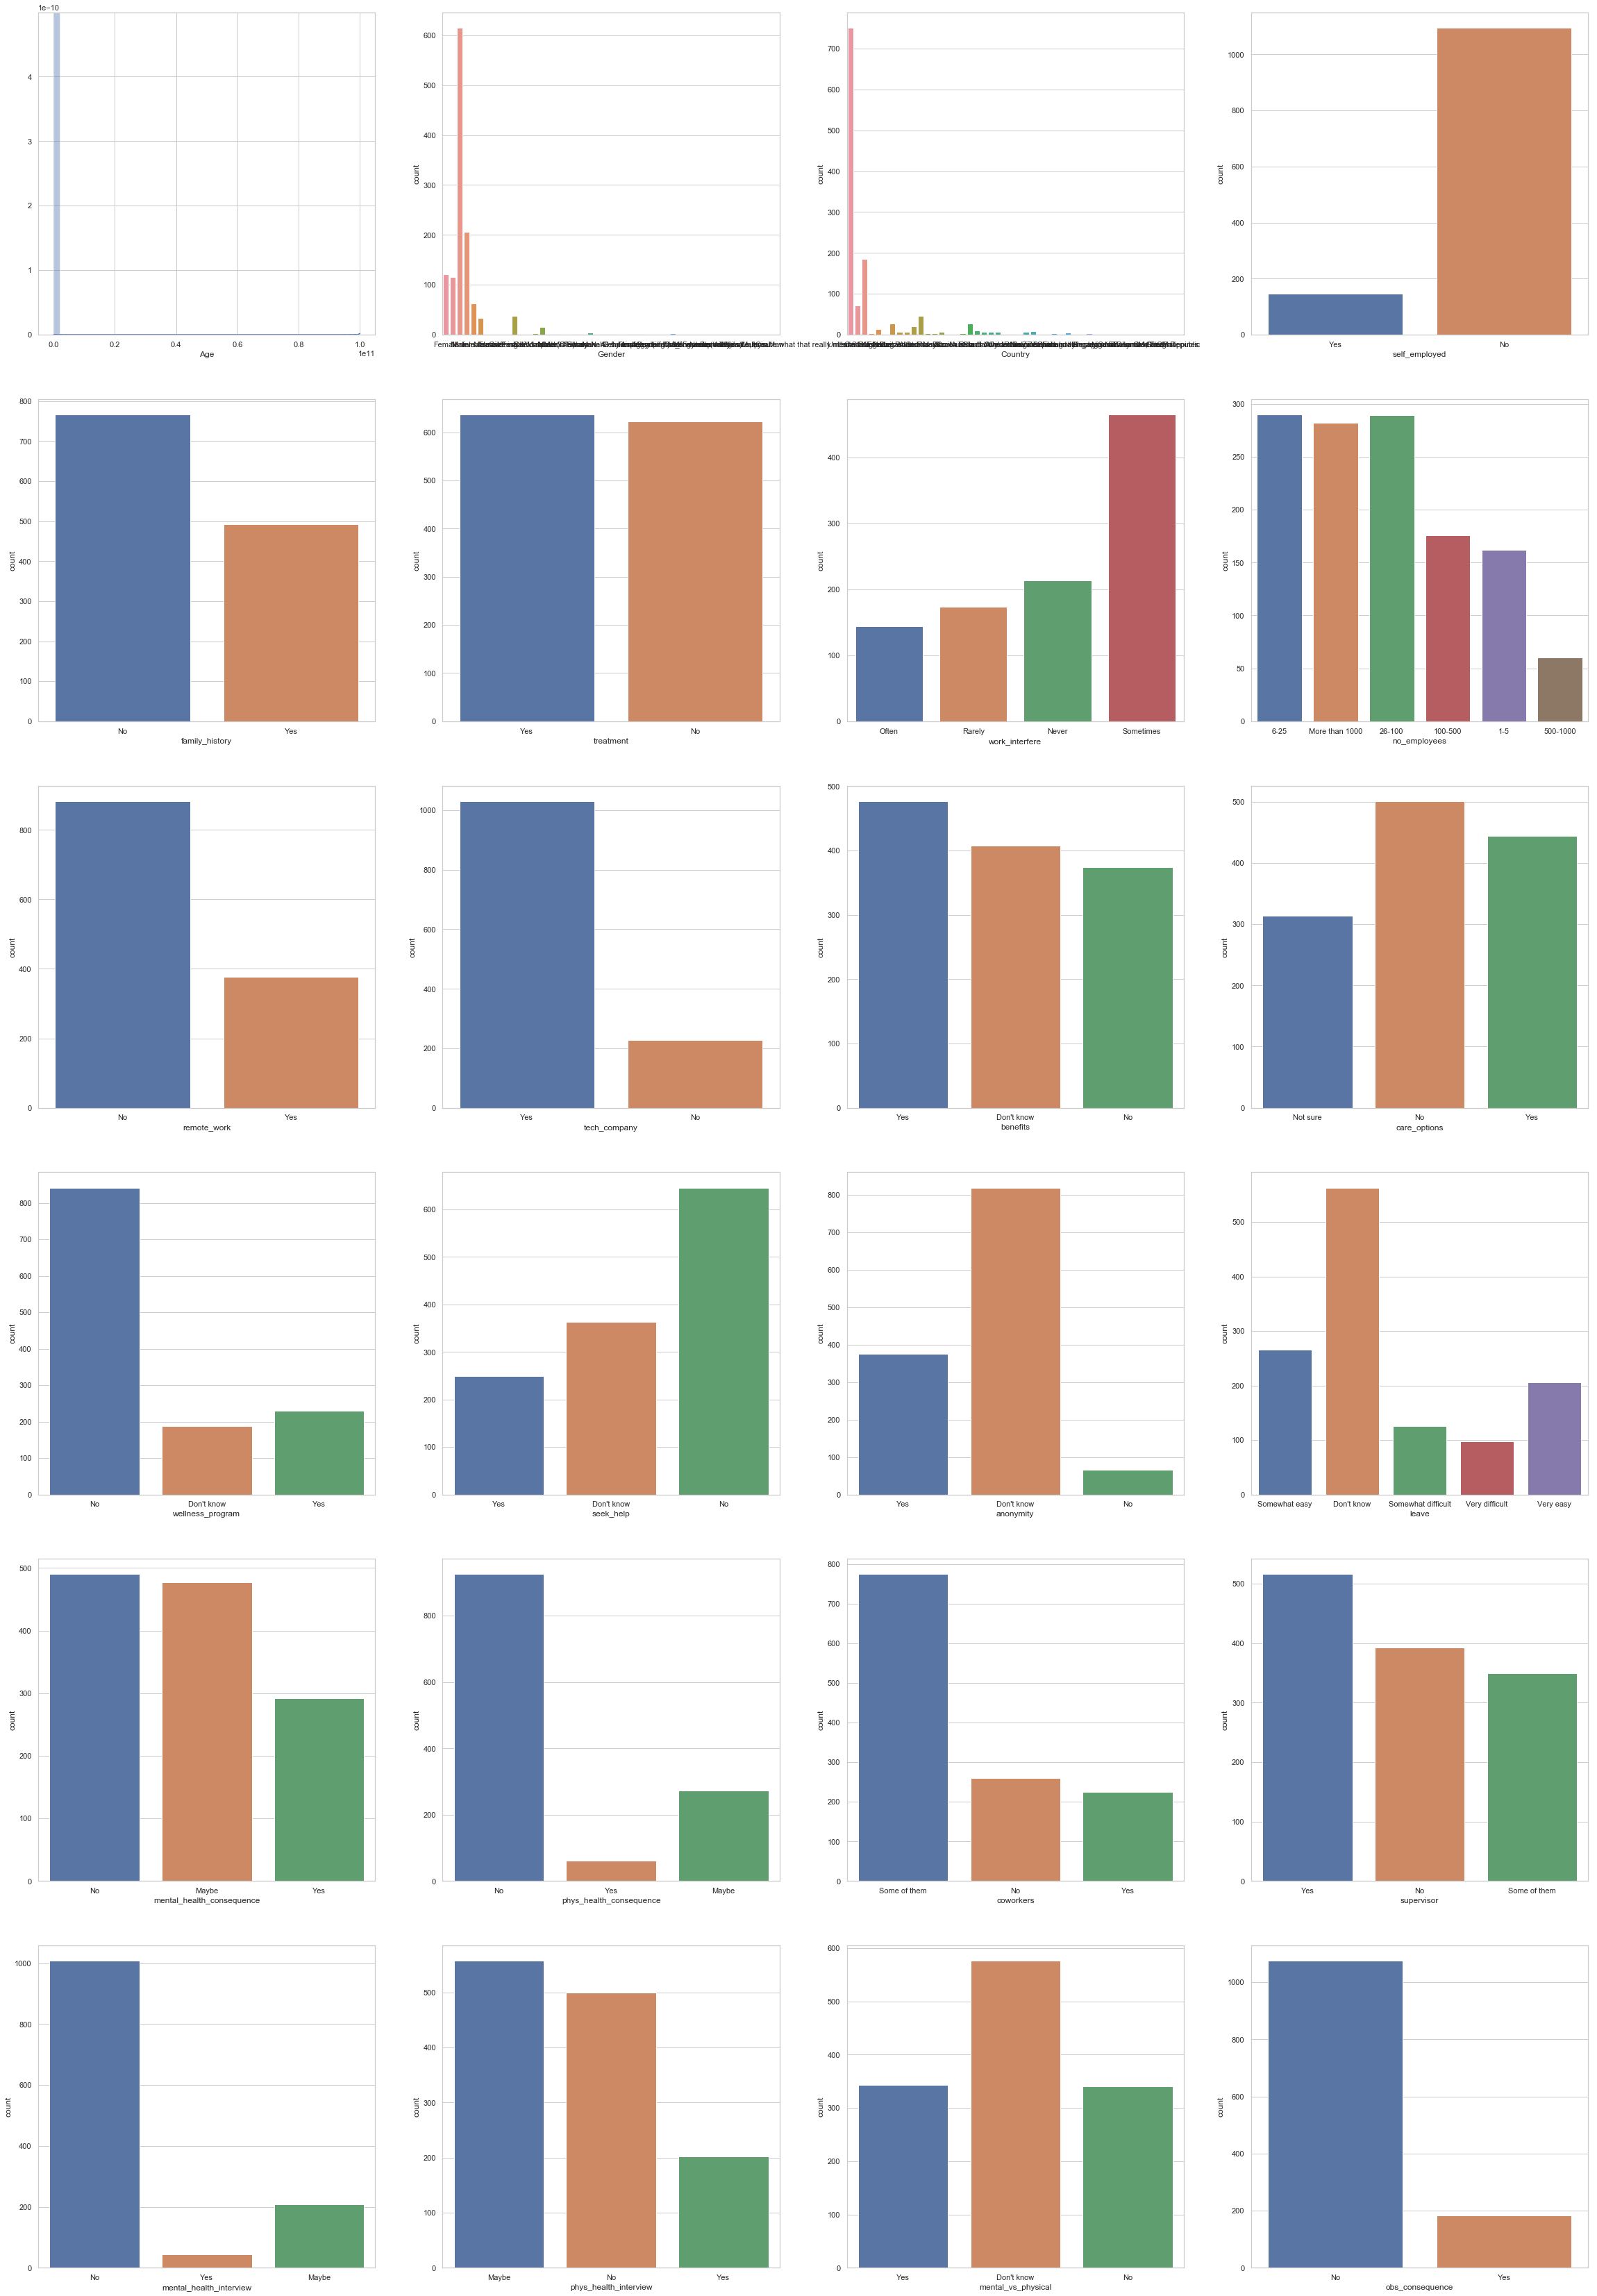

In [10]:
# Visualizing features
fig = plt.figure(figsize = (40,70))
for i, col in enumerate(data.columns):
    ax = fig.add_subplot(7, 4, i+1)
    if col=='Age':
        sns.distplot(data[col], ax=ax)
    elif col=='Timestamp':
        pass
    else:
        sns.countplot(data[col], ax=ax)

In [11]:
fig.savefig('plots.png')

In [12]:
from IPython.display import FileLinks
FileLinks('.')

./
  main.ipynb
  plots.png
  survey.csv
.\.ipynb_checkpoints/
  main-checkpoint.ipynb

# Data Preparation

## Gender

In [13]:
# There seems to be some disturbance in Gender
data.Gender.value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Female (trans)                                      2
Cis Male                                            2
Female                                              2
Man                                                 2
maile                                               1
something kinda male?                               1
femail                                              1
A little about you          

In [14]:
data['Gender'] = data['Gender'].str.lower().str.strip()

In [15]:
data['Gender'].value_counts().keys()

Index(['male', 'female', 'm', 'f', 'woman', 'make', 'cis male', 'man',
       'female (trans)', 'neuter', 'something kinda male?', 'all', 'p',
       'cis man', 'androgyne', 'mail', 'fluid', 'malr', 'msle', 'trans woman',
       'non-binary', 'ostensibly male, unsure what that really means', 'maile',
       'femail', 'mal', 'cis-female/femme', 'trans-female', 'nah',
       'male (cis)', 'guy (-ish) ^_^', 'queer', 'femake',
       'male leaning androgynous', 'agender', 'male-ish', 'genderqueer',
       'a little about you', 'cis female', 'female (cis)', 'queer/she/they',
       'enby'],
      dtype='object')

In [16]:
male_words = ['m', 'male', 'make', 'cis male', 'man', 'something kinda male?', 'malr', 'male (cis)', 'maile', 'mal', 'guy (-ish) ^_^'
             'male-ish', 'cis man', 'msle', 'male leaning androgynous', 'ostensibly male, unsure what that really means', 'mail']
female_words = ['f', 'female', 'woman', 'femake', 'fluid', 'cis-female/femme', 'female (cis)', 'cis female', 'femail',]

other_words = []
for word in data['Gender'].value_counts().keys():
    if (word not in male_words) & (word not in female_words):
        other_words.append(word)

In [17]:
other_words

['female (trans)',
 'neuter',
 'all',
 'p',
 'androgyne',
 'trans woman',
 'non-binary',
 'trans-female',
 'nah',
 'guy (-ish) ^_^',
 'queer',
 'agender',
 'male-ish',
 'genderqueer',
 'a little about you',
 'queer/she/they',
 'enby']

In [18]:
dict_replace = {}
dict_replace.update(dict.fromkeys(male_words, 'm'))
dict_replace.update(dict.fromkeys(female_words, 'f'))
dict_replace.update(dict.fromkeys(other_words, 'o'))
dict_replace

{'m': 'm',
 'male': 'm',
 'make': 'm',
 'cis male': 'm',
 'man': 'm',
 'something kinda male?': 'm',
 'malr': 'm',
 'male (cis)': 'm',
 'maile': 'm',
 'mal': 'm',
 'guy (-ish) ^_^male-ish': 'm',
 'cis man': 'm',
 'msle': 'm',
 'male leaning androgynous': 'm',
 'ostensibly male, unsure what that really means': 'm',
 'mail': 'm',
 'f': 'f',
 'female': 'f',
 'woman': 'f',
 'femake': 'f',
 'fluid': 'f',
 'cis-female/femme': 'f',
 'female (cis)': 'f',
 'cis female': 'f',
 'femail': 'f',
 'female (trans)': 'o',
 'neuter': 'o',
 'all': 'o',
 'p': 'o',
 'androgyne': 'o',
 'trans woman': 'o',
 'non-binary': 'o',
 'trans-female': 'o',
 'nah': 'o',
 'guy (-ish) ^_^': 'o',
 'queer': 'o',
 'agender': 'o',
 'male-ish': 'o',
 'genderqueer': 'o',
 'a little about you': 'o',
 'queer/she/they': 'o',
 'enby': 'o'}

In [19]:
data['Gender'] = data['Gender'].replace(dict_replace)

In [20]:
data['Gender'].value_counts()

m    993
f    248
o     18
Name: Gender, dtype: int64

In [21]:
data.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,f,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,m,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,m,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,m,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,m,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [22]:
data.isnull().any()

Age                          False
Gender                       False
Country                      False
self_employed                 True
family_history               False
treatment                    False
work_interfere                True
no_employees                 False
remote_work                  False
tech_company                 False
benefits                     False
care_options                 False
wellness_program             False
seek_help                    False
anonymity                    False
leave                        False
mental_health_consequence    False
phys_health_consequence      False
coworkers                    False
supervisor                   False
mental_health_interview      False
phys_health_interview        False
mental_vs_physical           False
obs_consequence              False
dtype: bool

## Country

In [23]:
data['Country'].value_counts()

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Switzerland                 7
Poland                      7
Italy                       7
Sweden                      7
South Africa                6
Brazil                      6
Belgium                     6
Israel                      5
Singapore                   4
Bulgaria                    4
Russia                      3
Mexico                      3
Austria                     3
Finland                     3
Colombia                    2
Greece                      2
Denmark                     2
Croatia                     2
Portugal                    2
Hungary                     1
Romania                     1
Thailand                    1
Spain                       1
Moldova   

### No changes required in 'Country' feature

## Self Employed

In [24]:
data.self_employed.value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

In [25]:
data.isnull().sum()

Age                            0
Gender                         0
Country                        0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [26]:
#Replacing null values in self_employed with No

In [27]:
data['self_employed'].replace({'Yes':1, 'No':0, np.nan:0}, inplace=True)

In [28]:
data.self_employed.value_counts()

0    1113
1     146
Name: self_employed, dtype: int64

## Family History

In [29]:
data['family_history'].value_counts()

No     767
Yes    492
Name: family_history, dtype: int64

In [30]:
data['family_history'].replace({'Yes':1, 'No':0}, inplace=True)

## Treatment (Target Variable)

In [31]:
data['treatment'].value_counts()

Yes    637
No     622
Name: treatment, dtype: int64

In [32]:
data['treatment'].replace({'Yes':1, 'No':0}, inplace=True)

## Work Interfere

In [33]:
data['work_interfere'].value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [34]:
#Is work_interfere depended on treatment?
data.loc[data.treatment==1, 'work_interfere']

0           Often
3           Often
6       Sometimes
8       Sometimes
10      Sometimes
12      Sometimes
15         Rarely
16      Sometimes
17      Sometimes
20      Sometimes
22          Often
23          Never
24         Rarely
25      Sometimes
27         Rarely
28      Sometimes
32      Sometimes
33      Sometimes
34      Sometimes
35         Rarely
39         Rarely
40      Sometimes
42      Sometimes
44      Sometimes
45      Sometimes
49         Rarely
50          Often
55         Rarely
57      Sometimes
59          Often
          ...    
1219    Sometimes
1220        Often
1221    Sometimes
1222       Rarely
1224    Sometimes
1225       Rarely
1228    Sometimes
1230    Sometimes
1231    Sometimes
1232    Sometimes
1233       Rarely
1234    Sometimes
1235        Often
1236        Often
1238        Often
1240    Sometimes
1241        Often
1242       Rarely
1243       Rarely
1245        Often
1247        Often
1248    Sometimes
1249    Sometimes
1250        Often
1251      

In [35]:
#Replacing null values with a placeholder
data['work_interfere'].replace({np.nan:-1, 'Never':0, 'Rarely':1, 'Sometimes':2, 'Often':3}, inplace=True)

## No. of employees

In [36]:
data.no_employees.value_counts()

6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               162
500-1000           60
Name: no_employees, dtype: int64

In [37]:
data['no_employees'].replace({'1-5':3, '6-25':15.5, '26-100':63, '100-500':300, '500-1000':750, 'More than 1000':1000}, inplace=True)

## Remote Work

In [38]:
data.remote_work.value_counts()

No     883
Yes    376
Name: remote_work, dtype: int64

In [39]:
data['remote_work'].replace({'Yes':1, 'No':0}, inplace=True)

## Tech Company

In [40]:
data['tech_company'].value_counts()

Yes    1031
No      228
Name: tech_company, dtype: int64

In [41]:
data['tech_company'].replace({'Yes':1, 'No':0}, inplace=True)

## Benefits

In [42]:
data['benefits'].value_counts()

Yes           477
Don't know    408
No            374
Name: benefits, dtype: int64

In [43]:
data['benefits'].replace({'Yes':1, 'No':-1, 'Don\'t know':0}, inplace=True)

## Care Options

In [44]:
data['care_options'].value_counts()

No          501
Yes         444
Not sure    314
Name: care_options, dtype: int64

In [45]:
data['care_options'].replace({'Yes':1, 'No':-1, 'Not sure':0}, inplace=True)

## Wellness Program

In [46]:
data['wellness_program'].value_counts()

No            842
Yes           229
Don't know    188
Name: wellness_program, dtype: int64

In [47]:
data['wellness_program'].replace({'Yes':1, 'No':-1, 'Don\'t know':0}, inplace=True)

## Seek Help

In [48]:
data['seek_help'].value_counts()

No            646
Don't know    363
Yes           250
Name: seek_help, dtype: int64

In [49]:
data['seek_help'].replace({'Yes':1, 'No':-1, 'Don\'t know':0}, inplace=True)

## Anonymity

In [50]:
data['anonymity'].value_counts()

Don't know    819
Yes           375
No             65
Name: anonymity, dtype: int64

In [51]:
data['anonymity'].replace({'Yes':1, 'No':-1, 'Don\'t know':0}, inplace=True)

## Leave

In [52]:
data['leave'].value_counts()

Don't know            563
Somewhat easy         266
Very easy             206
Somewhat difficult    126
Very difficult         98
Name: leave, dtype: int64

In [53]:
data['leave'].replace({'Very difficult':-2, 'Somewhat difficult':-1, 'Don\'t know':0, 'Somewhat easy':1, 'Very easy':2}, inplace=True)

## Mental Health Consequence 

In [54]:
data['mental_health_consequence'].value_counts()

No       490
Maybe    477
Yes      292
Name: mental_health_consequence, dtype: int64

In [55]:
data['mental_health_consequence'].replace({'Yes':1, 'No':-1, 'Maybe':0}, inplace=True)

## Physical Health Consequence

In [56]:
data['phys_health_consequence'].value_counts()

No       925
Maybe    273
Yes       61
Name: phys_health_consequence, dtype: int64

In [57]:
data['phys_health_consequence'].replace({'Yes':1, 'No':-1, 'Maybe':0}, inplace=True)

## Coworkers

In [58]:
data['coworkers'].value_counts()

Some of them    774
No              260
Yes             225
Name: coworkers, dtype: int64

In [59]:
data['coworkers'].replace({'Yes':1, 'No':-1, 'Some of them':0}, inplace=True)

## Supervisor

In [60]:
data['supervisor'].value_counts()

Yes             516
No              393
Some of them    350
Name: supervisor, dtype: int64

In [61]:
data['supervisor'].replace({'Yes':1, 'No':-1, 'Some of them':0}, inplace=True)

## Mental Health Interview

In [62]:
data['mental_health_interview'].value_counts()

No       1008
Maybe     207
Yes        44
Name: mental_health_interview, dtype: int64

In [63]:
data['mental_health_interview'].replace({'Yes':1, 'No':-1, 'Maybe':0}, inplace=True)

## Physical Health Interview

In [64]:
data['phys_health_interview'].value_counts()

Maybe    557
No       500
Yes      202
Name: phys_health_interview, dtype: int64

In [65]:
data['phys_health_interview'].replace({'Yes':1, 'No':-1, 'Maybe':0}, inplace=True)

## Mental vs Physical

In [66]:
data['mental_vs_physical'].value_counts()

Don't know    576
Yes           343
No            340
Name: mental_vs_physical, dtype: int64

In [67]:
data['mental_vs_physical'].replace({'Yes':1, 'No':-1, 'Don\'t know':0}, inplace=True)

## Obs Consequence

In [68]:
data['obs_consequence'].value_counts()

No     1075
Yes     184
Name: obs_consequence, dtype: int64

In [69]:
data['obs_consequence'].replace({'Yes':1, 'No':0}, inplace=True)

# Data Preparation Ends Here

In [70]:
data.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,f,United States,0,0,1,3,15.5,0,1,...,1,1,-1,-1,0,1,-1,0,1,0
1,44,m,United States,0,0,0,1,1000.0,0,0,...,0,0,0,-1,-1,-1,-1,-1,0,0
2,32,m,Canada,0,0,0,1,15.5,0,1,...,0,-1,-1,-1,1,1,1,1,-1,0
3,31,m,United Kingdom,0,1,1,3,63.0,0,1,...,-1,-1,1,1,0,-1,0,0,-1,1
4,31,m,United States,0,0,0,0,300.0,1,1,...,0,0,-1,-1,0,1,1,1,0,0


In [71]:
# One Hot Encoding on gender
final_data = pd.get_dummies(data=data, columns=['Gender', 'Country'], drop_first=True)

In [72]:
# Extracting the labels (target variables)
treatment = final_data.treatment
final_data.drop(['treatment'], axis=1, inplace = True)

In [73]:
final_data.head()

,Age,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,...,Country_Slovenia,Country_South Africa,Country_Spain,Country_Sweden,Country_Switzerland,Country_Thailand,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Zimbabwe
0,37,0,0,3,15.5,0,1,1,0,-1,...,0,0,0,0,0,0,0,1,0,0
1,44,0,0,1,1000.0,0,0,0,-1,0,...,0,0,0,0,0,0,0,1,0,0
2,32,0,0,1,15.5,0,1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
3,31,0,1,3,63.0,0,1,-1,1,-1,...,0,0,0,0,0,0,1,0,0,0
4,31,0,0,0,300.0,1,1,1,-1,0,...,0,0,0,0,0,0,0,1,0,0


# Splitting of Data

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(final_data, treatment, test_size=0.3, random_state=2)

# Baseline Model

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
lr = LogisticRegression()

In [78]:
lr.fit(X_train, y_train)

E:\AnacondaInstaller\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
lr.score(X_train, y_train)

0.49148694665153236

In [80]:
lr.score(X_test, y_test)

0.5370370370370371

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
dtr = DecisionTreeClassifier()

In [83]:
dtr.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [84]:
dtr.score(X_train, y_train)

1.0

In [85]:
dtr.score(X_test, y_test)

0.7222222222222222

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rf = RandomForestClassifier()

In [88]:
rf.fit(X_train, y_train)

E:\AnacondaInstaller\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [89]:
rf.score(X_train, y_train)

0.9920544835414302

In [90]:
rf.score(X_test, y_test)

0.7513227513227513

In [91]:
from sklearn.svm import SVC
svc = SVC()

In [92]:
svc.fit(X_train, y_train)
svc.score(X_train, y_train)

E:\AnacondaInstaller\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8547105561861521

In [93]:
svc.score(X_test, y_test)

0.8015873015873016

# Creating Pipeline

In [94]:
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
class MyTransformer(BaseEstimator, TransformerMixin):
    #Class constructor method that takes in a list of values as its argument
    def __init__(self):
        self.mean_imputer = SimpleImputer(strategy='mean')
        #self.most_freq_imp = Imputer(strategy='most_frequent', axis=0)
        return
        
    #Fit mean value for Age variable
    def fit( self, X, y = None  ):
        data = X.copy()
        #self.mean_imputer.fit(data['Age'].values.reshape(-1, 1))
        #self.most_freq_imp.fit(data['Country'].values.reshape(-1, 1))
        return self
    
    #Transformer method we wrote for this transformer 
    def transform(self, X , y = None ):
        data = X.copy()
        
        # Drop useless features
        data.drop(['Timestamp', 'state', 'comments'], axis=1, inplace=True)
        
        # Missing value treatment
        ## For age, use mean of age
        #data['Age'] = self.mean_imputer.transform(data['Age'].values.reshape(-1, 1))
        
        ## For Gender and Country, use most freq
        #data[['Gender', 'Country']] = self.most_freq_imp.transform(data['Country'])
        
        ## For work_interfere, use -1
        data['work_interfere'].fillna(-1, inplace=True)
        
        
        ## For others, simply put 0
        data.fillna(0, inplace= True)
        
        
        #Transforming Gender
        ##In future: Use NLP/Regex to categorize
        data['Gender'] = data['Gender'].str.lower().str.strip()
        male_words = ['m', 'male', 'make', 'cis male', 'man', 'something kinda male?', 'malr', 'male (cis)', 'maile', 'mal', 'guy (-ish) ^_^'
                     'male-ish', 'cis man', 'msle', 'male leaning androgynous', 'ostensibly male, unsure what that really means', 'mail']
        female_words = ['f', 'female', 'woman', 'femake', 'fluid', 'cis-female/femme', 'female (cis)', 'cis female', 'femail',]
        other_words = []
        
        for word in data['Gender'].value_counts().keys():
            if (word not in male_words) & (word not in female_words):
                other_words.append(word)

        dict_replace = {}
        dict_replace.update(dict.fromkeys(male_words, 'm'))
        dict_replace.update(dict.fromkeys(female_words, 'f'))
        dict_replace.update(dict.fromkeys(other_words, 'o'))

        data['Gender'] = data['Gender'].replace(dict_replace)
        
        # Treating missing values of Gender with male
        data['Gender'].fillna('m', inplace=True)
        
        #Transforimg Yes/No variables
        data.replace({'Yes':1}, inplace=True)
        data.replace({'Some of them':0, 'Maybe':0, 'Don\'t know':0, 'Not sure':0}, inplace=True)
        maybe_vars = ['benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'mental_health_consequence', 
                      'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                      'mental_vs_physical']
        
        # When 3 categories available (Yes/Maybe/No) the use (1/0/-1). For (Yes/No) use (1/0)
        data[maybe_vars].replace({'No':-1}, inplace=True)
        data.replace({'No':0}, inplace=True)
        
        
        
        # Work interfere variable
        data['work_interfere'].replace({np.nan:-1, 'Never':0, 'Rarely':1, 'Sometimes':2, 'Often':3}, inplace=True)
        
        # Leave variable
        data['leave'].replace({'Very difficult':-2, 'Somewhat difficult':-1, 'Don\'t know':0, 'Somewhat easy':1, 'Very easy':2}, inplace=True)
        
        # No of employees variable
        data['no_employees'].replace({'1-5':3, '6-25':15.5, '26-100':63, '100-500':300, '500-1000':750, 'More than 1000':1000}, inplace=True)
        
        return data

# Modelling

In [95]:
data2 = pd.read_csv('survey.csv')

In [96]:
# Splitting
target = data2.treatment
data2.drop('treatment', axis=1, inplace=True)

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data2, target, test_size=0.25, random_state=2)

In [98]:
# Models to test
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

ohe = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'), ['Gender', 'Country'])],    # The column numbers to be transformed (here is [0] but can be [0, 1, 3])
    remainder='passthrough')                         # Leave the rest of the columns untouched

def train_model(model, X_train, y_train, param_grid, cv=5):
    pipe_full = Pipeline(steps=[('transform', MyTransformer()), ('ohe', ohe), ('model', model)])
    print("Training model now")
    clf = GridSearchCV(estimator = pipe_full, param_grid=param_grid, cv=cv)
    clf.fit(X_train, y_train)
    print('Best_parameters: ', clf.best_params_)
    print('Best validation score: ', clf.best_score_)
    return clf.best_estimator_

### Training Logistic Regression

In [100]:
pd.options.mode.chained_assignment = None

In [101]:
logistic= LogisticRegression(solver='liblinear')
penalty=['l1','l2']
C=np.logspace(0,4,10)
param_lr = {'model__C':C, 'model__penalty':penalty}

In [102]:
best_lr = train_model(logistic, X_train, y_train, param_lr)

Training model now
Best_parameters:  {'model__C': 1.0, 'model__penalty': 'l1'}
Best validation score:  0.8283898305084746


E:\AnacondaInstaller\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [103]:
best_lr.score(X_train, y_train)

0.8411016949152542

In [104]:
best_lr.score(X_test, y_test)

0.8412698412698413

# Training RandomForestClassifier

In [105]:
rf = RandomForestClassifier()
param_rf = {
    'model__bootstrap': [True],
    'model__max_depth': np.arange(3, 9),
    'model__max_features': [0.3, 0.5, 0.7, 1.0],
    'model__min_samples_leaf':np.linspace(0.1, 0.5, 5),
    'model__min_samples_split':np.linspace(0.05, 0.2, 4),
    'model__n_estimators': [100, 300, 700]}

In [ ]:
best_rf = train_model(rf, X_train, y_train, param_rf)

Training model now


In [ ]:
best_rf.score(X_train, y_train)